# Autoencoder demon 

describle: 使用全连接网络训练 手写体样本。


In [1]:
#!/usr/bin/env python
# -*- coding: UTF-8 -*-

In [16]:
import time
import sys
import torch
import torchvision
import torch.utils.data as Data
import torch.nn as nn
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from mpl_toolkits.mplot3d import Axes3D

In [17]:
sys.path.append("..")

In [3]:
start_time = time.time()
print(start_time)
torch.manual_seed(1)  # 为了使用同样的随机初始化种子以形成相同的随机效果

# 超参数

EPOCH = 10
BATCH_SIZE = 64
LR = 0.005
N_TEST_IMG = 5

1647488001.394331


In [20]:
train_data = torchvision.datasets.MNIST(
    root='..\\data\\MINIST',  # 数据集的位置
    transform=torchvision.transforms.ToTensor(),  # 将图片转化成取值[0,1]的Tensor用于网络处理
    train=True,  # 如果为True则为训练集，如果为False则为测试集
    download=False  # 不用下载
)
loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

torch.Size([60000, 28, 28])
torch.Size([60000])
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0]

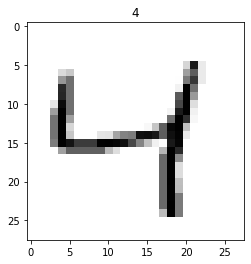

In [21]:
print(train_data.train_data.size())
print(train_data.train_labels.size())
print(train_data.train_data[0])
plt.imshow(train_data.train_data[2].numpy(),cmap='Greys')
plt.title('%i'%train_data.train_labels[2])
plt.show()

In [9]:
class AutoEncoder(nn.Module):
    """
    自动编码器

    """

    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 32),
            nn.Tanh(),
            nn.Linear(32, 16),
            nn.Tanh(),
            nn.Linear(16, 3)
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 16),
            nn.Tanh(),
            nn.Linear(16, 32),
            nn.Tanh(),
            nn.Linear(32, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()

        )

    def forward(self, _x):
        """
        前向网络
        :param _x:
        :return:
        """
        _encoded = self.encoder(_x)
        _decoded = self.decoder(_encoded)
        return _encoded, _decoded



In [11]:
Coder = AutoEncoder()
print(Coder)

optimizer = torch.optim.Adam(Coder.parameters(), lr=LR)
loss_func = nn.MSELoss()

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): Tanh()
    (6): Linear(in_features=32, out_features=16, bias=True)
    (7): Tanh()
    (8): Linear(in_features=16, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=16, bias=True)
    (1): Tanh()
    (2): Linear(in_features=16, out_features=32, bias=True)
    (3): Tanh()
    (4): Linear(in_features=32, out_features=64, bias=True)
    (5): Tanh()
    (6): Linear(in_features=64, out_features=128, bias=True)
    (7): Tanh()
    (8): Linear(in_features=128, out_features=784, bias=True)
    (9): Sigmoid()
  )
)


In [22]:
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(loader):
        b_x = x.view(-1, 28 * 28)
        b_y = x.view(-1, 28 * 28)
        b_label = y
        encoded, decoded = Coder(b_x)
        loss = loss_func(decoded, b_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if step % 5 == 0:
            print('Epoch :', epoch, '|', 'train_loss:%.4f' % loss.data)

torch.save(Coder, '..\\data\\AutoEncoder.pkl')
print('________________________________________')
print('finish training')

Epoch : 0 | train_loss:0.0364
Epoch : 0 | train_loss:0.0337
Epoch : 0 | train_loss:0.0344
Epoch : 0 | train_loss:0.0339
Epoch : 0 | train_loss:0.0351
Epoch : 0 | train_loss:0.0357
Epoch : 0 | train_loss:0.0399
Epoch : 0 | train_loss:0.0365
Epoch : 0 | train_loss:0.0403
Epoch : 0 | train_loss:0.0391
Epoch : 0 | train_loss:0.0347
Epoch : 0 | train_loss:0.0372
Epoch : 0 | train_loss:0.0343
Epoch : 0 | train_loss:0.0384
Epoch : 0 | train_loss:0.0363
Epoch : 0 | train_loss:0.0360
Epoch : 0 | train_loss:0.0362
Epoch : 0 | train_loss:0.0376
Epoch : 0 | train_loss:0.0373
Epoch : 0 | train_loss:0.0371
Epoch : 0 | train_loss:0.0343
Epoch : 0 | train_loss:0.0346
Epoch : 0 | train_loss:0.0362
Epoch : 0 | train_loss:0.0337
Epoch : 0 | train_loss:0.0377
Epoch : 0 | train_loss:0.0365
Epoch : 0 | train_loss:0.0384
Epoch : 0 | train_loss:0.0390
Epoch : 0 | train_loss:0.0370
Epoch : 0 | train_loss:0.0370
Epoch : 0 | train_loss:0.0364
Epoch : 0 | train_loss:0.0338
Epoch : 0 | train_loss:0.0367
Epoch : 0 

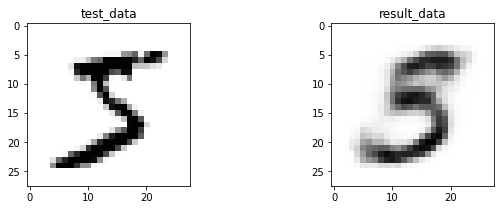

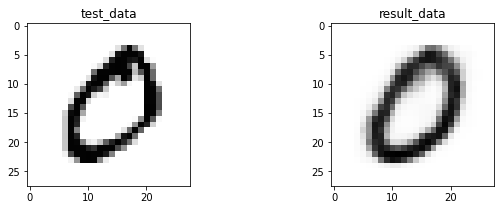

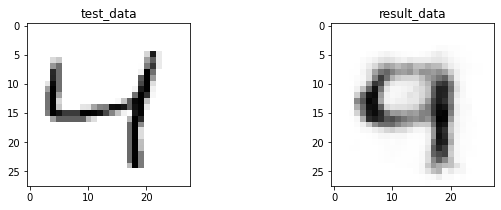

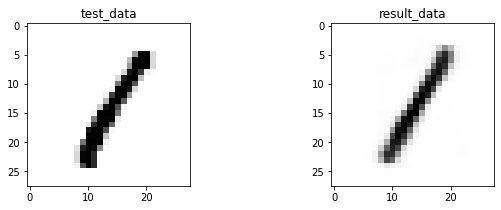

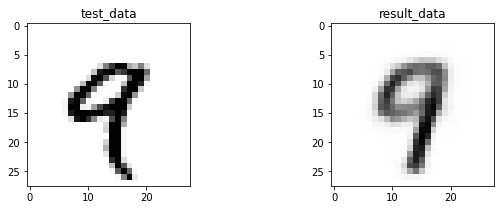

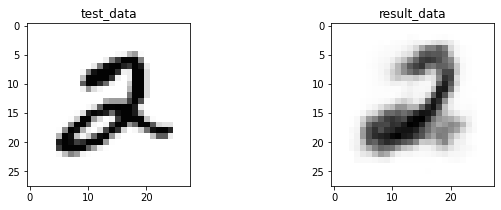

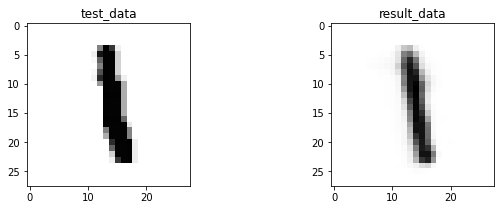

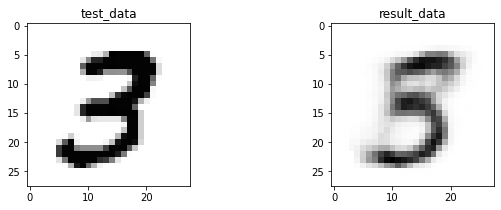

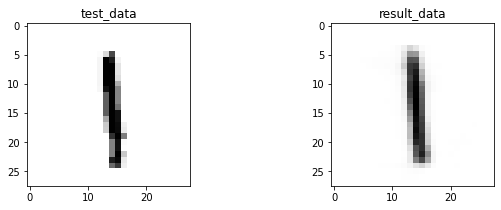

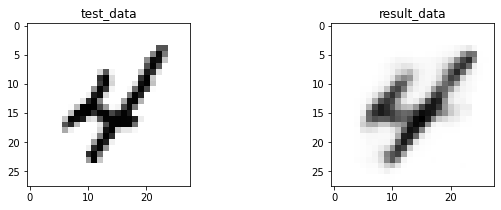

In [13]:
for i in range(10):
    test_data = train_data.train_data[i].view(-1, 28 * 28).type(torch.FloatTensor) / 255.
    _, result = Coder(test_data)
    # print('输入的数据的维度', train_data.train_data[i].size())
    # print('输出的结果的维度',result.size())

    im_result = result.view(28, 28)
    # print(im_result.size())
    plt.figure(1, figsize=(10, 3))
    plt.subplot(121)
    plt.title('test_data')
    plt.imshow(train_data.train_data[i].numpy(), cmap='Greys')

    plt.figure(1, figsize=(10, 3))
    plt.subplot(122)
    plt.title('result_data')
    plt.imshow(im_result.detach().numpy(), cmap='Greys')
    plt.show()
    plt.pause(0.5)

plt.ioff()
